In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow_io as tfio

from tensorflow import keras
from scipy import signal
from scipy.io import wavfile

In [ ]:
DIREC = 'TRAIN_V2/data_out_2/'

SAMPLING_RATE = 16000

In [ ]:
def path_to_audio(path):
    """Reads and decodes an audio file."""
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, SAMPLING_RATE)
    return audio

C:\Users\cjbla\AppData\Local\Temp/ipykernel_24232/2557818934.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


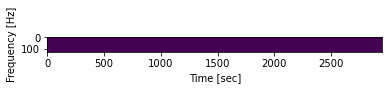

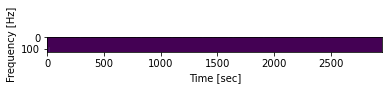

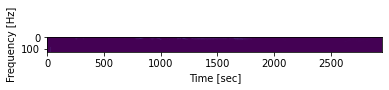

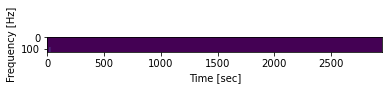

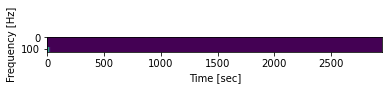

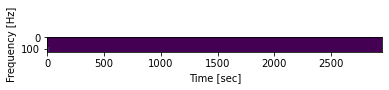

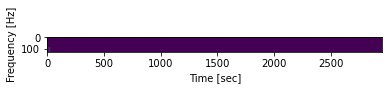

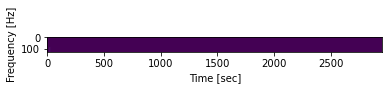

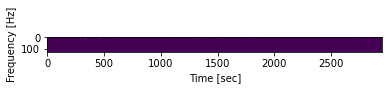

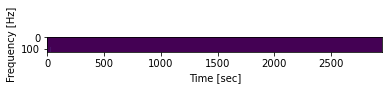

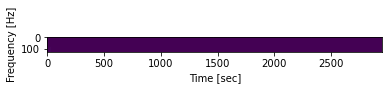

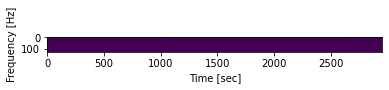

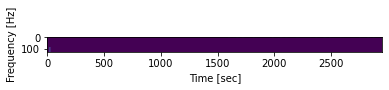

In [3]:
#read the files in train_files
train_files = os.listdir(DIREC + str(18) + '/')
for i in range(len(train_files)):
    sample_rate, samples = wavfile.read(DIREC + str(18) + '/' + train_files[i])
    audio = path_to_audio(DIREC + str(18) + '/' + train_files[i])
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()